# Cyrptocurrency Market Cap

In [13]:
# import libraries
import requests
import json
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
from config import lcw_api

## API Setup & Call

In [14]:
# analysis uses livecoinwatch API
# a free API key and documentation can be found here: https://www.livecoinwatch.com/tools/api

# variables for API post request
endpoint = 'overview/history'
api_key = lcw_api

# enter start date
start_date_str = '2021-1-01 00:00:00'

# leave as True (for end date of today) or enter end date
end_date_is_now = True
end_date_str = ''


In [15]:
# convert time to epoch time in milliseconds
format = "%Y-%m-%d %H:%M:%S"
start_date = dt.datetime.strptime(start_date_str, format).timestamp() * 1000

if end_date_is_now == True:
    
    end_date = dt.datetime.now().timestamp() * 1000
else:
    
    end_date = dt.datetime.strptime(end_date_str, format).timestamp() * 1000

# set up API post request
url = 'https://api.livecoinwatch.com/' + endpoint

headers = {'content-type': 'application/json',
           'x-api-key': api_key
          }

body = {'currency': 'USD',
        'start': start_date,
        'end': end_date
       }

# send post request and convert response to json
res = requests.post(url, headers=headers, data=json.dumps(body))
res_json = res.json()

# put response in dataframe
df = pd.DataFrame(res_json)

# convert epoch time to datetime as set date as index
df['date'] = pd.to_datetime(df['date'], unit='ms')
df.set_index('date', inplace=True)


## Scatter Plots to Indentify Correlations

Correlation Liquidity & Market Cap: 0.8992259375308764


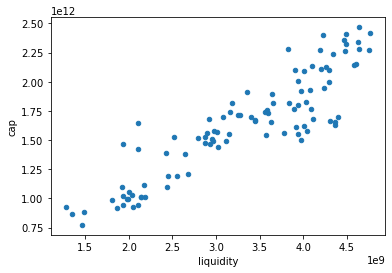

In [16]:
# plot scatters and find correlations
fig, ax = plt.subplots()
df.plot(kind="scatter", x='liquidity', y='cap', ax=ax);

# fig, ax = plt.subplots()
# df.plot(kind="scatter", x='volume', y='cap', ax=ax);

print(f'''Correlation Liquidity & Market Cap: {df['cap'].corr(df['liquidity'])}''')

# print(f'''Correlation Volume & Market Cap: {df['cap'].corr(df['volume'])}''')

## Plot Market Cap with Rolling Averages

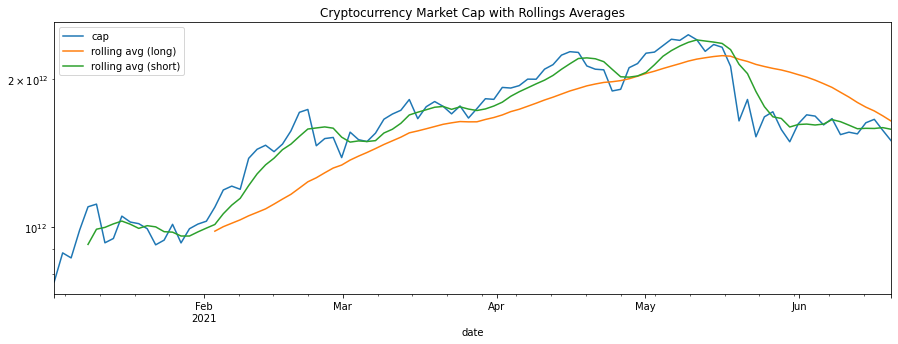

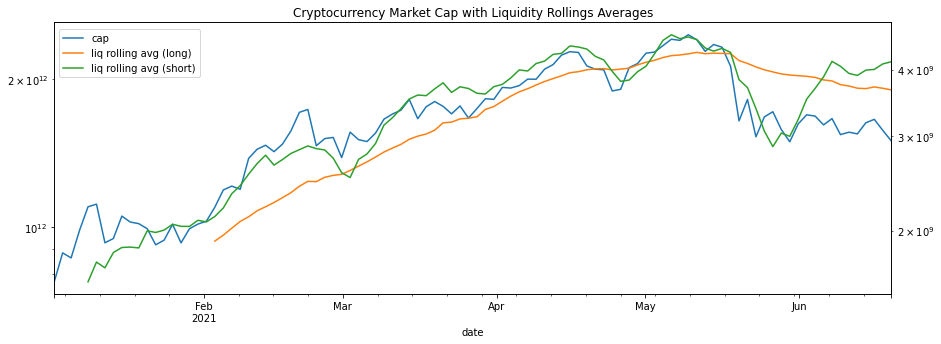

In [17]:
# rolling averages
df_rolling_long = df.rolling(window=20).mean()
df_rolling_short = df.rolling(window=5).mean()

# line plots with rolling averages
fig1, ax1 = plt.subplots(figsize=(15,5))
df['cap'].plot(ax=ax1, logy=True, legend=True)
df_rolling_long['cap'].plot(ax=ax1, logy=True, legend=True)
df_rolling_short['cap'].plot(ax=ax1, logy=True, legend=True)
ax1.set(title='Cryptocurrency Market Cap with Rollings Averages')
ax1.legend(['cap', 'rolling avg (long)', 'rolling avg (short)'], loc='upper left');

fig2, ax2 = plt.subplots(figsize=(15,5))
df['cap'].plot(ax=ax2, logy=True, legend=False)
df_rolling_long['liquidity'].plot(ax=ax2, logy=True, legend=False, secondary_y=True)
df_rolling_short['liquidity'].plot(ax=ax2, logy=True, legend=False, secondary_y=True)
ax2.set(title='Cryptocurrency Market Cap with Liquidity Rollings Averages')
fig2.legend(['cap', 'liq rolling avg (long)', 'liq rolling avg (short)'], loc='upper left', bbox_to_anchor=(.125, .875));

# fig3, ax3 = plt.subplots(figsize=(15,5))
# df['cap'].plot(ax=ax3, logy=True, legend=False)
# df_rolling_long['volume'].plot(ax=ax3, logy=True, legend=False, secondary_y=True)
# df_rolling_short['volume'].plot(ax=ax3, logy=True, legend=False, secondary_y=True)
# ax3.set(title='Cryptocurrency Market Cap with Volume Rollings Averages')
# fig3.legend(['cap', 'vol rolling avg (long)', 'vol rolling avg (short)'], loc='upper left', bbox_to_anchor=(.125, .875));
